In [81]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

### Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]

scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

**1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.**

In [82]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)

Для парной регрессии коэффициенты вычисляются по формулам:

$$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \: b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$$


In [83]:
b1 = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b0 = np.mean(scoring) - b1 * np.mean(salary)
b0,b1

(444.1773573243596, 2.620538882402765)

**Метод наименьших квадратов:**

$$(X \cdot b - y)^\top \cdot (X \cdot b - y) \rightarrow \min_b.$$

Для такой задачи возможно записать аналитическое решение:

$$b = (X^\top X)^{-1} X^\top y.$$

In [84]:
#Нужно добавить столбец из 1, соответствующий фиктивному фактору.

ones = np.ones((len(salary), 1))
x1 = np.hstack((ones, np.array([salary]).T))
x1

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

Запишем матрицу $X^\top X$ и посчитаем её определитель.

In [85]:
XTX = x1.T.dot(x1)

np.linalg.det(XTX)

349464.00000000023

In [86]:
#Определитель не близок к нулю, поэтому можно записать аналитическое решение:

XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x1.T).dot(scoring)

b, "Решения совпадают"

(array([444.17735732,   2.62053888]), 'Решения совпадают')

**2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.**

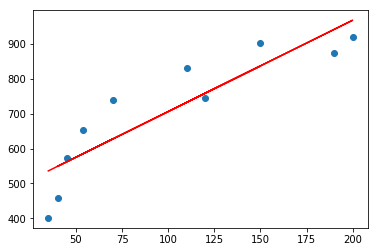

In [87]:
ox = salary
oy = b0 + b1 * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='red')

**3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.**

In [88]:
z1 = b0 + b1 * salary

print(f'real: {scoring[:5]}')
print(f'pred: {z1[:5]}')

real: [401. 574. 874. 919. 459.]
pred: [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262]


In [89]:
R2 = (np.corrcoef(salary, scoring) ** 2)[0][1]
R2

0.7876386635293682

Средняя ошибка аппроксимации вычисляется по формуле:

$$\overline{A} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} \Bigl| {{\frac{y_i - z_i}{y_i}} \Bigr|}.$$

In [90]:
np.abs((scoring - z1) / scoring).mean()

0.11469251843561709

**4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.**

$k_1 = k$, $k_2 = n - k - 1$ 

In [91]:
k1 = 1
k2 = len(salary) - k1 - 1

T1 = (R2 / (1 - R2)) * (k2 / k1)
T1

29.671640859664432

In [92]:
alpha = 0.05 #уровень значимости

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

T1 > F_crit, поэтому уравнение регрессии статистически значимо.

**5. Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.**

In [93]:
#Значение стандартной ошибки коэффициента наклона

n = len(salary)
upper = ((scoring - z1) ** 2).sum() / (n - 2)
lower = ((salary - salary.mean()) ** 2).sum()

b1_error=np.sqrt(upper / lower)
b1_error

0.48108279568516005

Зададим уровень значимости $\alpha = 0.05$. В нашем случае $n = 10$, поэтому нас интересует квантиль $t_{1 - 0.05/2, \: 8} = 2.30600413503$.

Зададим уровень значимости $\alpha$. Тогда критическая область выглядит следующим образом:

$$\Omega_\alpha = \left( -\infty, - t_{1 - \alpha/2, \: n - 2} \right) \cup \left( t_{1 - \alpha/2, \: n - 2}, \infty \right).$$


In [94]:
T = b1 / b1_error
t = 2.30600413503

T, (b1 - t * b1_error, b1 + t * b1_error)

(5.447168150485579, (1.5111599662609934, 3.7299177985445366))

Полученное нами значение $\hat{b}_1$ попадает в критическую область – нулевая гипотеза (об отсутствии корреляции между значениями из $x$ и $y$) отвергается, откуда следует, что параметр $b_1$ является значимым.

In [95]:
b0_error = b1_error * np.sqrt((salary ** 2).mean())

In [96]:
T0 = b0 / b0_error
T0

7.866210524668863

Полученное нами значение $\hat{b}_0$ попадает в критическую область – нулевая гипотеза (об отсутствии корреляции между значениями из $x$ и $y$) отвергается, откуда следует, что параметр $b_0$ является значимым.

### Задача 2

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица квантилей распределения Стьюдента?

Функцию Лапласа (с таблицей ее значений) и частными случаями двух и трех сигм можно брать при известной дисперсии величины, в иных случаях берется таблица квантилей распределения Стьюдента